In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

For this notebook we will use the breast cancer dataset from `sklearn`:

In [3]:
from sklearn.datasets import load_breast_cancer

dic = load_breast_cancer()
data = dic['data']
target = dic['target']

**TASK 1:**

Standardize the inputs and prepare a training and test sample with ratio 3:1 using `train_test_split`. Use ` random_state=42` to make your result easily comparable. We will train our models on the training set, and keep the test set to compare the models at the end of this notebook. [2 marks]


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data 3:1 train:test
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25, random_state=42)

# Scale the data to mean 0 with unit variance
scaler = StandardScaler().fit(data_train)
data_train_scaled, data_test_scaled = scaler.transform(data_train), scaler.transform(data_test)

We will consider two inputs:

**full feature set**: this is the full set of features you used above.

**reduced feature set**: this is considering only the first 3 features in the full dataset. 

Later in this notebook we will consider a "quick" test that only uses the first three features and a "thorough" test that uses all features.

**TASK 2:**

Use a logistic regression model to classify the data using the **reduced feature set**. Plot the scores as a function of the regularisation parameter and an estimate of the uncertainty on the score using 5-fold cross validation. You might want to use `fill_between` for the uncertainties. Your plot should have appropriate labels. [6 marks]


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Use only the reduced dataset
train_reduced, test_reduced  = data_train_scaled[:,:3], data_test_scaled[:,:3]

# Create logistic regression instance
lr = LogisticRegression(max_iter=5000)

# Use grid search CV to find a model with best score given a range of regularisation strengths
lr_search_reduced = GridSearchCV(
    lr,
    {"C" : np.logspace(-3, 3, 1000)},
    cv=5,
    verbose=True)

# Fit above grid search instance to the training data
lr_search_reduced.fit(train_reduced, target_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-03, 1.01392541e-03, 1.02804473e-03, 1.04236067e-03,
       1.05687597e-03, 1.07159340e-03, 1.08651577e-03, 1.10164595e-03,
       1.11698682e-03, 1.13254132e-03, 1.14831241e-03, 1.16430313e-03,
       1.18051653e-03, 1.19695570e-03, 1.21362380e-03, 1.23052400e-03,
       1.24765955e-03, 1.26503372...
       7.27548353e+02, 7.37679760e+02, 7.47952252e+02, 7.58367791e+02,
       7.68928372e+02, 7.79636013e+02, 7.90492762e+02, 8.01500696e+02,
       8.12661920e+02, 8.23978568e+02, 8.35452806e+02, 8.47086827e+02,
       8.58882856e+02, 8.70843150e+02, 8.82969996e+02, 8.95265713e+02,
       9.07732653e+02, 9.20373200e+02, 9.33189772e+02, 9.46184819e+02,
       9.59360829e+02, 9.72720319e+02, 9.86265846e+02, 1.00000000e+03])},
             verbose=True)

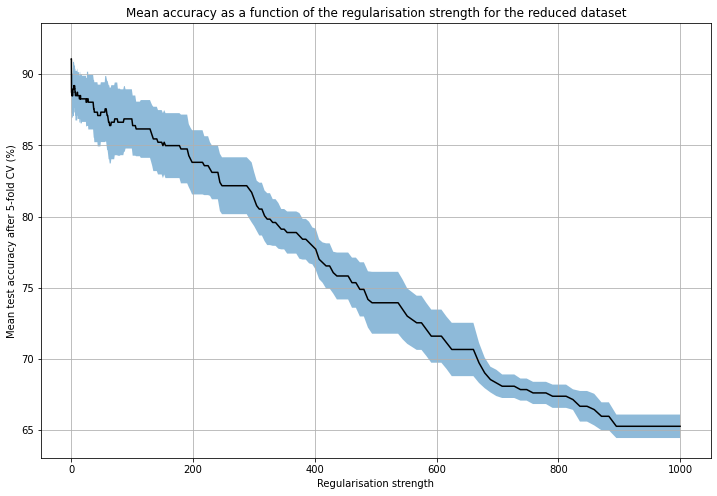

In [6]:
# Convert regularisation strength to np array for more convenient calculations
Cs = np.array(lr_search_reduced.cv_results_["param_C"], dtype=float)
# SKLearn C values are the inverse of regularisation strength.
# Taking the inverse of the C values gives regularisation strength
reg_strength = 1/Cs
# Get mean test score as np array to plot on the y axis
scores = np.array(lr_search_reduced.cv_results_["mean_test_score"], dtype=float) * 100
# Get uncertainty in the mean test score
errors = (np.array(lr_search_reduced.cv_results_["std_test_score"], dtype=float) / np.sqrt(5)) * 100

# Create the figure
plt.figure(figsize=(12,8))
plt.fill_between(reg_strength, scores-errors, scores+errors, alpha=0.5)
plt.plot(reg_strength, scores, color='black')
plt.xlabel("Regularisation strength")
plt.ylabel("Mean test accuracy after 5-fold CV (%)")
plt.title("Mean accuracy as a function of the regularisation strength for the reduced dataset")
plt.grid()

**TASK 3:**

Use a logistic regression model to classify the data using the **full feature set**. Plot the scores as a function of the regularisation parameter and an estimate of the uncertainty on the score using 5-fold cross validation. You might want to use `fill_between` for the uncertainties. Your plot should have appropriate labels. [5 marks]


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create logistic regression instance
lr = LogisticRegression(max_iter=5000)

# Use grid search CV to find a model with best score given a range of regularisation strengths
lr_search_full = GridSearchCV(
    lr,
    {"C" : np.logspace(-3, 3, 100)},
    cv=5,
    verbose=True)

# Fit above grid search instance to the training data
lr_search_full.fit(data_train_scaled, target_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
             verbose=True)

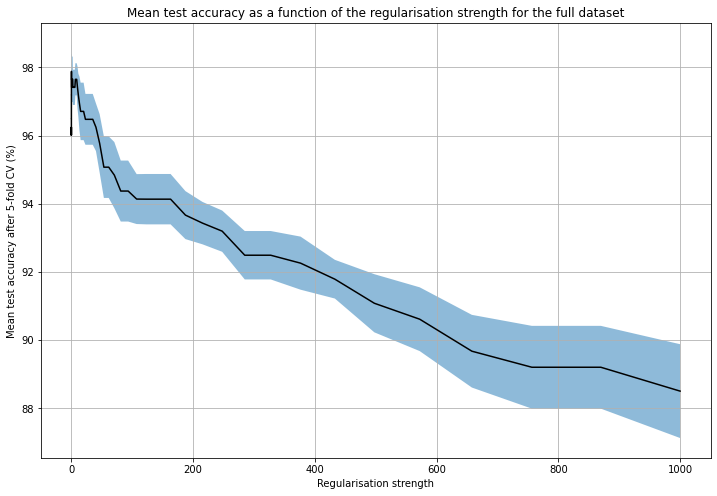

In [8]:
# Convert regularisation strength to np array for more convenient calculations
Cs = np.array(lr_search_full.cv_results_["param_C"], dtype=float)
# SKLearn C values are the inverse of regularisation strength.
# Taking the inverse of the C values gives regularisation strength
reg_strength = 1/Cs
# Get mean test score as np array to plot on the y axis
scores = np.array(lr_search_full.cv_results_["mean_test_score"], dtype=float) * 100
# Get uncertainty in the mean test score
errors = (np.array(lr_search_full.cv_results_["std_test_score"], dtype=float) / np.sqrt(5)) * 100

# Create the figure
plt.figure(figsize=(12,8))
plt.fill_between(reg_strength, scores-errors, scores+errors, alpha=0.5)
plt.plot(reg_strength, scores, color='black')
plt.xlabel("Regularisation strength")
plt.ylabel("Mean test accuracy after 5-fold CV (%)")
plt.title("Mean test accuracy as a function of the regularisation strength for the full dataset")
plt.grid()

**TASK 4:**

Using the test set, plot the ROC curve (true positive rate vs false positive rate) for the two models above to compare their performance. [4 marks]


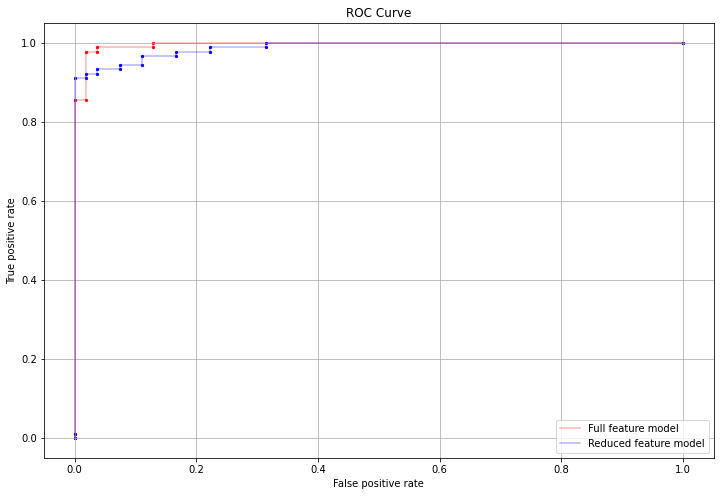

In [9]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(12,8))

''' Full feature model '''
# Find probability of a positive case
probs_full = lr_search_full.predict_proba(data_test_scaled)[:,1]
# Get FPR and TPR from roc_curve function
fpr_full, tpr_full, thresh_full = roc_curve(target_test, probs_full)
# Plot on graph
plt.scatter(fpr_full, tpr_full, s=5, color="r")
plt.plot(fpr_full, tpr_full, color="r", alpha=0.3, label="Full feature model")

''' Reduced feature model '''
# Find probability of a positive case
probs_reduced = lr_search_reduced.predict_proba(test_reduced)[:,1]
# Get FPR and TPR from roc_curve function
fpr_reduced, tpr_reduced, thresh_reduced = roc_curve(target_test, probs_reduced)
# Plot on graph
plt.scatter(fpr_reduced, tpr_reduced, s=5, color="b")
plt.plot(fpr_reduced, tpr_reduced, color="b", alpha=0.3, label="Reduced feature model")


''' Plot customisation '''
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.show()

**TASK 5:**

Thinking about a situation where we can use the two models as diagnostic in practice, we can imagine that the reduced feature set model would be a quick test, as it relies on fewer features, while the full feature set model would require more individual tests to be performed on a patient. For this task we consider the following diagnostic: first we perform a classification using the "quick" diagnostic using the reduced feature set model, if the decision function comes within one unit of the decision boundary (i.e. the model is not very confident of its answer) we perform the more thorough test using the full feature set, fixing the decision boundary for the full feature set model at 0. Produce a ROC curve for this diagnostic strategy and show it on a plot together with the ROC curve for the two models above. [8 marks]


In [10]:
# Use reduced feature model initially to find probabilities of a positive case
red_prob = lr_search_reduced.predict_proba(test_reduced)
# Initialise an empty list to store the prediction probabilities
preds_probs = []

# Iterate over probabilities of a positive case
for i, prob in enumerate(red_prob[:,1]):
    if 0.4 < prob < 0.6:
    # If the probability is between 0.4 and 0.6, run the full feature model to get a more accurate result
        pred_probability = lr_search_full.predict_proba(data_test_scaled[i].reshape(1,-1))
        preds_probs.append(pred_probability[0,1])
    else:
    # If probability from reduced model is not between 0.4 or 0.6, use probability from the reduced model
        preds_probs.append(red_prob[i][1])

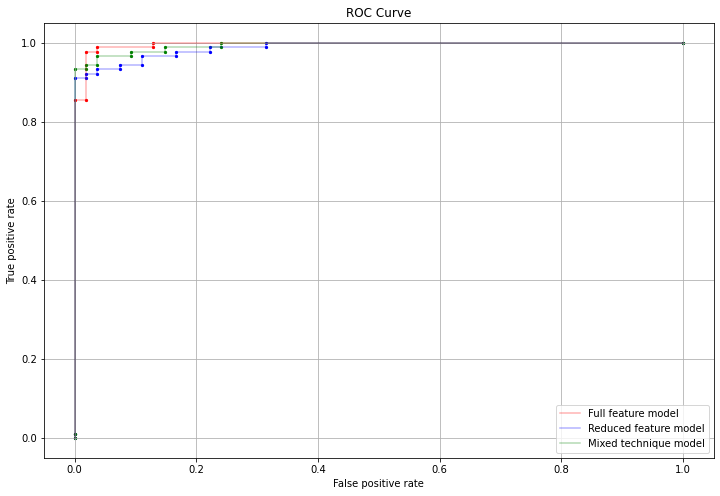

In [11]:
plt.figure(figsize=(12,8))

''' Full feature model '''
# Find probability of a positive case
probs_full = lr_search_full.predict_proba(data_test_scaled)[:,1]
# Get FPR and TPR from roc_curve function
fpr_full, tpr_full, thresh_full = roc_curve(target_test, probs_full)
# Plot on graph
plt.scatter(fpr_full, tpr_full, s=5, color="r")
plt.plot(fpr_full, tpr_full, color="r", alpha=0.3, label="Full feature model")

''' Reduced feature model '''
# Find probability of a positive case
probs_reduced = lr_search_reduced.predict_proba(test_reduced)[:,1]
# Get FPR and TPR from roc_curve function
fpr_reduced, tpr_reduced, thresh_reduced = roc_curve(target_test, probs_reduced)
# Plot on graph
plt.scatter(fpr_reduced, tpr_reduced, s=5, color="b")
plt.plot(fpr_reduced, tpr_reduced, color="b", alpha=0.3, label="Reduced feature model")

''' Mixed feature model '''
# Get FPR and TPR from roc_curve function
fpr_mix, tpr_mix, thresh_mix = roc_curve(target_test, preds_probs)
# Plot on graph
plt.scatter(fpr_mix, tpr_mix, s=5, color="g")
plt.plot(fpr_mix, tpr_mix, color="g", alpha=0.3, label="Mixed technique model")

''' Plot customisation '''
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.show()

**TASK 6:**

Consider the following models:

- a neural network with 4 hidden layers with each 4 nodes with sigmoid activation function,
- a $k$-neighbors model with $k=5$
- a Support Vector Machine.

Use each of these model to fit the data using the full feature set. Using 5-fold cross validation make an estimate of the expected score and its uncertainty. Show your results in an error bar plot. Use cross validation to select paramters if necessary. [15 marks]


In [12]:
''' Import packages '''
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

###### NEURAL NETWORK FITTING

In [13]:
# Create instance of MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(4,4,4,4), activation='logistic', max_iter=10000)

# Create parameter grid to search
params = {
    "alpha"             : np.logspace(-5, -3, 8),
    "solver"            : ['lbfgs', 'adam'],
    "learning_rate_init": np.logspace(-4, -2, 8)
}

# Create grid search instance to search the above parameter grid for the MLPClassifier instance
nn_search = GridSearchCV(nn, params, cv=5, verbose=True)

# Fit the grid search to the training data
nn_search.fit(data_train_scaled, target_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(4, 4, 4, 4),
                                     max_iter=10000),
             param_grid={'alpha': array([1.00000000e-05, 1.93069773e-05, 3.72759372e-05, 7.19685673e-05,
       1.38949549e-04, 2.68269580e-04, 5.17947468e-04, 1.00000000e-03]),
                         'learning_rate_init': array([0.0001    , 0.00019307, 0.00037276, 0.00071969, 0.0013895 ,
       0.0026827 , 0.00517947, 0.01      ]),
                         'solver': ['lbfgs', 'adam']},
             verbose=True)

In [14]:
# Print the performance of the model on the test dataset
print("Test dataset accuracy is {}%".format(np.round(nn_search.score(data_test_scaled, target_test)*100,2)))

# Store the score of the best model and the error in the score from cross-validation
nn_score = nn_search.cv_results_['mean_test_score'][nn_search.best_index_]
nn_error = nn_search.cv_results_['std_test_score'][nn_search.best_index_] / np.sqrt(5)

print("Mean CV accuracy is {}%".format(nn_score*100))

Test dataset accuracy is 97.9%
Mean CV accuracy is 97.41723666210672%


###### K- NEIGHBOURS FITTING

In [16]:
# Create instance of MLPClassifier
kn = KNeighborsClassifier(n_neighbors=5)

# Create grid search instance to try uniform and distance weightings
kn_search = GridSearchCV(
    kn,
    {"weights":["uniform", "distance"]},
    cv=5,
    verbose=True)

# Fit grid search to the training data
kn_search.fit(data_train_scaled, target_train)

# Print the model performance on the testing dataset
print("Test dataset accuracy is {}%".format(np.round(kn_search.score(data_test_scaled, target_test)*100, 2)))

# Store the score and score error of the best found model
kn_score = kn_search.cv_results_['mean_test_score'][kn_search.best_index_]
kn_error = kn_search.cv_results_['std_test_score'][kn_search.best_index_] / np.sqrt(5)

# Print the score from cross validation of the best model
print("Mean CV accuracy is {}%".format(kn_score*100))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Test dataset accuracy is 95.8%
Mean CV accuracy is 96.00820793433653%


###### SVM MODEL FITTING

In [17]:
# Create instance of linear SVC
svc = LinearSVC(max_iter=50000)

# Create grid search instance to try a range of values for regularisation strength
svc_search = GridSearchCV(
    svc,
    {"C" : np.logspace(-3, 3, 100)},
    cv=5,
    verbose=True)

# Fit grid search to the training data
svc_search.fit(data_train_scaled, target_train)

# Print the model performance on the testing dataset
print("Test dataset accuracy is {}%".format(np.round(svc_search.score(data_test_scaled, target_test) * 100, 2)))

# Store the score and score error of the best found model
svc_score = svc_search.cv_results_['mean_test_score'][svc_search.best_index_]
svc_error = svc_search.cv_results_['std_test_score'][svc_search.best_index_] / np.sqrt(5)

# Print the score from cross validation of the best model
print("Mean CV accuracy is {}%".format(svc_score*100))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Test dataset accuracy is 99.3%
Mean CV accuracy is 97.88508891928865%


###### PLOTTING RESULTS

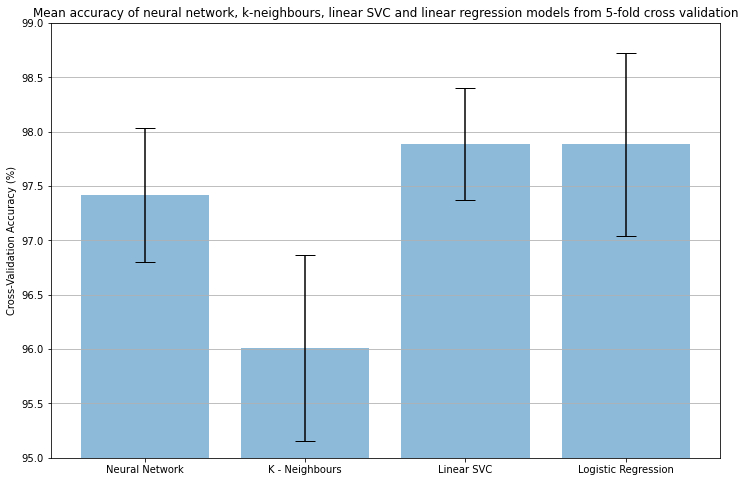

In [18]:
# Get logistic regression score from earlier
lr_score = lr_search_full.cv_results_['mean_test_score'][lr_search_full.best_index_]
lr_error = lr_search_full.cv_results_['std_test_score'][lr_search_full.best_index_] / np.sqrt(5)

# Collect the data into lists/arrays for plotting
models = ["Neural Network", "K - Neighbours", "Linear SVC", "Logistic Regression"]
scores = np.array([nn_score, kn_score, svc_score, lr_score]) * 100
errors = np.array([nn_error, kn_error, svc_error, lr_error]) * 100

# Plot the bar chart
plt.figure(figsize=(12,8))
plt.bar(models, scores, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Cross-Validation Accuracy (%)')
plt.ylim([95, 99])
plt.title('Mean accuracy of neural network, k-neighbours, linear SVC and linear regression models from 5-fold cross validation')
plt.grid(axis="y")